<a href="https://colab.research.google.com/github/Pro-Mentor/ml-model/blob/main/final/extracted_skills_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the desired IT job based on given skills

This project consists of finding a correlation between job title and skills.

We will focus on the following jobs:

* Software Engineer
* QA Engineer
* UI/UX Engineer
* Project Manager
* Data Engineer
* DevOps Engineer
* ML Engineer

# 1. Problem Definition



> How well can we predict the desired IT job role based on given skills?





## 2. Data

The data is extracted from couple of datasets available in Kaggle platform.

1. [US Software Engineer Jobs](https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs)
2. [US based Technology Jobs](https://www.kaggle.com/code/rayjohnsoncomedy/job-skills/input?select=dice_com-job_us_sample.csv)
3. [Data Engineer Jobs](https://www.kaggle.com/code/samruddhim/analysis-of-data-engineer-jobs/input)
4. [Online Job Postings](https://www.kaggle.com/code/tusharsarkar/it-job-recommendation/input?select=data+job+posts.csv)

Then the skills were extracted from the job descriptions by using OpenAI API.

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O

# to preprocess text data
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

import nltk
from nltk.corpus import stopwords

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline
from textblob import Word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# give permission for the google drive to integrate with Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* The skills which were extracted from job descriptions using OpenAI API were exported into multiple csv files.
* Here all the csv files are combined based on the job title.



# New Section

In [ ]:
se_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-1.csv')
se_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-2.csv')
se_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-3.csv')
se_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-4.csv')
se_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-5.csv')
se_6 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-6.csv')
se_7 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-7.csv')
se_8 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-8.csv')
se_9 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-9.csv')
se_10 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-10.csv')
se_11 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/software-engineer-skills-11.csv')

df_se = pd.concat([
    se_1, se_2, se_3, se_4, se_5, se_6, se_7, se_8, se_9, se_10, se_11
], ignore_index=True)

df_se.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/software-engineer-skills.csv', index=False)


In [ ]:
ui_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/uiux-engineer-skills-1.csv')
ui_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/uiux-engineer-skills-2.csv')
ui_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/uiux-engineer-skills-3.csv')
ui_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/uiux-engineer-skills-4.csv')
ui_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/uiux-engineer-skills-5.csv')

df_ui = pd.concat([
    ui_1, ui_2, ui_3, ui_4, ui_5
], ignore_index=True)

df_ui.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/uiux-engineer-skills.csv', index=False)

In [ ]:
qa_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-1.csv')
qa_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-2.csv')
qa_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-3.csv')
qa_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-4.csv')
qa_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-5.csv')
qa_6 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-6.csv')
qa_7 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-7.csv')
qa_8 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-8.csv')
qa_9 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-9.csv')
qa_10 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-10.csv')
qa_11 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-11.csv')
qa_12 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-12.csv')
qa_13 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-13.csv')
qa_14 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/qa-engineer-skills-14.csv')

df_qa = pd.concat([
    qa_1, qa_2, qa_3, qa_4, qa_5, qa_6, qa_7, qa_8, qa_9, qa_10, qa_11, qa_12, qa_13, qa_14
], ignore_index=True)

df_qa.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/qa-engineer-skills.csv', index=False)

In [ ]:
de_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-1.csv')
de_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-2.csv')
de_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-3.csv')
de_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-4.csv')
de_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-5.csv')
de_6 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-6.csv')
de_7 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-7.csv')
de_8 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-8.csv')
de_9 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-9.csv')
de_10 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-10.csv')
de_11 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-11.csv')
de_12 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-12.csv')
de_13 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-13.csv')
de_14 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/data-engineer-skills-14.csv')

df_de = pd.concat([
    de_1, de_2, de_3, de_4, de_5, de_6, de_7, de_8, de_9, de_10, de_11, de_12, de_13, de_14
], ignore_index=True)

df_de.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/data-engineer-skills.csv', index=False)

In [ ]:
do_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-1.csv')
do_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-2.csv')
do_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-3.csv')
do_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-4.csv')
do_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-5.csv')
do_6 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-6.csv')
do_7 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/devops-engineer-skills-7.csv')

df_do = pd.concat([
    do_1, do_2, do_3, do_4, do_5, do_6, do_7
], ignore_index=True)

df_do.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/devops-engineer-skills.csv', index=False)

In [ ]:
ml_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/ml-engineer-skills-1.csv')
ml_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/ml-engineer-skills-2.csv')
ml_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/ml-engineer-skills-3.csv')
ml_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/ml-engineer-skills-4.csv')
ml_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/ml-engineer-skills-5.csv')


df_ml = pd.concat([
    ml_1, ml_2, ml_3, ml_4, ml_5
], ignore_index=True)

df_ml.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/ml-engineer-skills.csv', index=False)

In [ ]:
pm_1 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-1.csv')
pm_2 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-2.csv')
pm_3 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-3.csv')
pm_4 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-4.csv')
pm_5 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-5.csv')
pm_6 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-6.csv')
pm_7 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-7.csv')
pm_8 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-8.csv')
pm_9 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-9.csv')
pm_10 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-10.csv')
pm_11 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-11.csv')
pm_12 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-12.csv')
pm_13 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-13.csv')
pm_14 = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/project-manager-skills-14.csv')

df_pm = pd.concat([
    pm_1, pm_2, pm_3, pm_4, pm_5, pm_6, pm_7, pm_8, pm_9, pm_10, pm_11, pm_12, pm_13, pm_14
], ignore_index=True)

df_pm.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/project-manager-skills.csv', index=False)

# Extracted Finalized Skills

In [ ]:
# read all the extracted finalized skills

software_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/software-engineer-skills.csv')
qa_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/qa-engineer-skills.csv')
data_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/data-engineer-skills.csv')
devops_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/devops-engineer-skills.csv')
ml_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/ml-engineer-skills.csv')
project_manager_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/project-manager-skills.csv')
uiux_engineer_skills = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/uiux-engineer-skills.csv')

se_rows = software_engineer_skills.shape[0]
qa_rows = qa_engineer_skills.shape[0]
de_rows = data_engineer_skills.shape[0]
do_rows = devops_engineer_skills.shape[0]
ml_rows = ml_engineer_skills.shape[0]
pm_rows = project_manager_skills.shape[0]
ui_rows = uiux_engineer_skills.shape[0]

# print the number of rows
print("Number of total skill sets extracted")
print(f"Software Engineer : {se_rows}")
print(f"QA Engineer : {qa_rows}")
print(f"UI/UX Engineer : {ui_rows}")
print(f"Project Manager : {pm_rows}")
print(f"Data Engineer : {de_rows}")
print(f"DevOps Engineer : {do_rows}")
print(f"ML Engineer : {ml_rows}")

Number of total skill sets extracted
Software Engineer : 350
QA Engineer : 350
UI/UX Engineer : 350
Project Manager : 350
Data Engineer : 350
DevOps Engineer : 350
ML Engineer : 347


In [ ]:
# concatenate all the skills into one csv
df_all = pd.concat([
    software_engineer_skills,
    qa_engineer_skills,
    uiux_engineer_skills,
    project_manager_skills,
    data_engineer_skills,
    devops_engineer_skills,
    ml_engineer_skills
], ignore_index=True)

print(df_all.shape[0])
df_all.head(10)

2447


,title,description,skills
0,Software Engineer,- Develop Web Applications in accordance with ...,"Web application development, coding standards,..."
1,Software Engineer,Develop quality software and web applications....,"quality software development, web application ..."
2,Software Engineer,Job Title: Entry Level Software Engineer.\n Tr...,NaN
3,Software Engineer,Use programming languages and software to buil...,"programming languages, software development, a..."
4,Software Engineer,Create programme database for the office and\r...,NaN
5,Software Engineer,- Develop enterprise-level software solutions ...,"enterprise-level software development, softwar..."
6,Software Engineer,"- Be responsible for design, development and d...","software development, debugging, problem-solvi..."
7,Software Engineer,- Develop both internal systems and entire ext...,"web development, e-commerce, software design, ..."
8,Software Engineer,"- Work as a part of team, developing Unix base...","teamwork, Unix, multithread applications, docu..."
9,Software Engineer,Reports to* DIRECTOR OF MARKETING.\n PHP - Equ...,"PHP, Java script"


In [ ]:
# converting into a random sample dataset
df_all = df_all.sample(n=df_all.shape[0], random_state=42)

df_all.head(10)

,title,description,skills
2222,Machine Learning Engineer,Experience applying various machine learning t...,"machine learning techniques, understanding key..."
1228,Project Manager,"BPA Technologies, Inc., was founded in 2004 by...","sales, account strategy, pipeline management, ..."
1159,Project Manager,"Senior IT Project Manager, Charlestown, MA Kel...","PMP, 7-10 years related experience, managed he..."
1957,DevOps Engineer,Automating at-will setup/teardown of environme...,"automating, setup/teardown of environments, de..."
879,UI/UX Engineer,Helping patients start and stay on treatment w...,"phone, email, SMS, mobile, web, printed materi..."
1786,DevOps Engineer,You have a proven track record of implementing...,"highly secured applications, scalable applicat..."
1477,Data Engineer,Job Description\nData Engineer\n\nBigtime Ente...,"Data Engineer,Python,AWS,SQL,Apache,ML algorit..."
668,QA Engineer,The following job is a long-term contract with...,"Linux backend experience, Java programming, QA..."
1050,Project Manager,Business Development Sr Manager/Director/AVP –...,"IT services, Selling, Business Development, Ta..."
2081,DevOps Engineer,This role is responsible to bring their experi...,"experiences, best practices, collaborative att..."


In [ ]:
# export random sample dataset into a csv

df_all.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/random-sample-dataset.csv', index=False)

# New Section

In [3]:
df = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/random-sample-dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2447 non-null   object
 1   description  2447 non-null   object
 2   skills       2373 non-null   object
dtypes: object(3)
memory usage: 57.5+ KB


In [ ]:
df.head(10)

,title,description,skills
0,Machine Learning Engineer,Experience applying various machine learning t...,"machine learning techniques, understanding key..."
1,Project Manager,"BPA Technologies, Inc., was founded in 2004 by...","sales, account strategy, pipeline management, ..."
2,Project Manager,"Senior IT Project Manager, Charlestown, MA Kel...","PMP, 7-10 years related experience, managed he..."
3,DevOps Engineer,Automating at-will setup/teardown of environme...,"automating, setup/teardown of environments, de..."
4,UI/UX Engineer,Helping patients start and stay on treatment w...,"phone, email, SMS, mobile, web, printed materi..."
5,DevOps Engineer,You have a proven track record of implementing...,"highly secured applications, scalable applicat..."
6,Data Engineer,Job Description\nData Engineer\n\nBigtime Ente...,"Data Engineer,Python,AWS,SQL,Apache,ML algorit..."
7,QA Engineer,The following job is a long-term contract with...,"Linux backend experience, Java programming, QA..."
8,Project Manager,Business Development Sr Manager/Director/AVP –...,"IT services, Selling, Business Development, Ta..."
9,DevOps Engineer,This role is responsible to bring their experi...,"experiences, best practices, collaborative att..."


In [ ]:
df.isna().sum()

title           0
description     0
skills         74
dtype: int64

In [ ]:
# Check the values of different columns

# Set the display option to show all rows
pd.set_option('display.max_rows', None)

df.title.value_counts()

Project Manager              350
DevOps Engineer              350
UI/UX Engineer               350
Data Engineer                350
QA Engineer                  350
Software Engineer            350
Machine Learning Engineer    347
Name: title, dtype: int64

In [ ]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2447 non-null   object
 1   description  2447 non-null   object
 2   skills       2373 non-null   object
dtypes: object(3)
memory usage: 57.5+ KB


In [ ]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

title          0.000000
description    0.000000
skills         0.030241
dtype: float64

In [ ]:
df_tmp = df_tmp.dropna()
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2446
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2373 non-null   object
 1   description  2373 non-null   object
 2   skills       2373 non-null   object
dtypes: object(3)
memory usage: 74.2+ KB


In [ ]:
# dropping the job-description column
df_tmp.drop('description', axis=1, inplace=True)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2373 entries, 0 to 2446
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2373 non-null   object
 1   skills  2373 non-null   object
dtypes: object(2)
memory usage: 55.6+ KB


In [ ]:
df_tmp.head(10)

,title,skills
0,Machine Learning Engineer,"machine learning techniques, understanding key..."
1,Project Manager,"sales, account strategy, pipeline management, ..."
2,Project Manager,"PMP, 7-10 years related experience, managed he..."
3,DevOps Engineer,"automating, setup/teardown of environments, de..."
4,UI/UX Engineer,"phone, email, SMS, mobile, web, printed materi..."
5,DevOps Engineer,"highly secured applications, scalable applicat..."
6,Data Engineer,"Data Engineer,Python,AWS,SQL,Apache,ML algorit..."
7,QA Engineer,"Linux backend experience, Java programming, QA..."
8,Project Manager,"IT services, Selling, Business Development, Ta..."
9,DevOps Engineer,"experiences, best practices, collaborative att..."


In [ ]:
# export the preprocessed dataframe

df_tmp.to_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/random-sample-dataset-preprocessed.csv', index=False)

# New Section

In [4]:
df = pd.read_csv('/content/drive/MyDrive/FYP/datasets/final-skills/completed/random-sample-dataset-preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2373 non-null   object
 1   skills  2373 non-null   object
dtypes: object(2)
memory usage: 37.2+ KB


In [ ]:
df.head(10)

,title,skills
0,Machine Learning Engineer,"machine learning techniques, understanding key..."
1,Project Manager,"sales, account strategy, pipeline management, ..."
2,Project Manager,"PMP, 7-10 years related experience, managed he..."
3,DevOps Engineer,"automating, setup/teardown of environments, de..."
4,UI/UX Engineer,"phone, email, SMS, mobile, web, printed materi..."
5,DevOps Engineer,"highly secured applications, scalable applicat..."
6,Data Engineer,"Data Engineer,Python,AWS,SQL,Apache,ML algorit..."
7,QA Engineer,"Linux backend experience, Java programming, QA..."
8,Project Manager,"IT services, Selling, Business Development, Ta..."
9,DevOps Engineer,"experiences, best practices, collaborative att..."


In [ ]:
df.T.tail(20)

,0,1,2,3,4,5,6,7,8,9,...,2363,2364,2365,2366,2367,2368,2369,2370,2371,2372
title,Machine Learning Engineer,Project Manager,Project Manager,DevOps Engineer,UI/UX Engineer,DevOps Engineer,Data Engineer,QA Engineer,Project Manager,DevOps Engineer,...,Data Engineer,Software Engineer,Project Manager,QA Engineer,Machine Learning Engineer,Data Engineer,Project Manager,Project Manager,Project Manager,UI/UX Engineer
skills,"machine learning techniques, understanding key...","sales, account strategy, pipeline management, ...","PMP, 7-10 years related experience, managed he...","automating, setup/teardown of environments, de...","phone, email, SMS, mobile, web, printed materi...","highly secured applications, scalable applicat...","Data Engineer,Python,AWS,SQL,Apache,ML algorit...","Linux backend experience, Java programming, QA...","IT services, Selling, Business Development, Ta...","experiences, best practices, collaborative att...",...,"data engineer, database marketing, data extrac...","web based projects, website development, PHP, ...","large scale project experience, project manage...","automation test engineer, design, create, main...","Scala, Python, machine learning, algorithm dev...","data engineering, analysis, modelling, transfo...","project management, structured approach, proje...","routers, networking switches, Technical PM, ne...","Technical PM, Technical Strategy, mobile deplo...","HTML, JSP, jQuery, CSS, JavaScript, Ajax"


In [5]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [6]:
## jda stands for job description aggregated
jda = df_tmp.groupby(['title']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jda)

Aggregated job descriptions: 

                       title  \
0              Data Engineer   
1            DevOps Engineer   
2  Machine Learning Engineer   
3            Project Manager   
4                QA Engineer   
5          Software Engineer   
6             UI/UX Engineer   

                                              skills  
0  Data Engineer,Python,AWS,SQL,Apache,ML algorit...  
1  automating, setup/teardown of environments, de...  
2  machine learning techniques, understanding key...  
3  sales, account strategy, pipeline management, ...  
4  Linux backend experience, Java programming, QA...  
5  tough puzzles, communicating complex ideas sim...  
6  phone, email, SMS, mobile, web, printed materi...  


In [7]:
## Lower case
df_tmp['skills'] = df_tmp['skills'].apply(lambda x: " ".join(x.lower()for x in x.split()))

## remove tabulation and punctuation
df_tmp['skills'] = df_tmp['skills'].str.replace('[^\w\s]',' ')

## digits
df_tmp['skills'] = df_tmp['skills'].str.replace('\d+', '')

#remove stop words
stop = stopwords.words('english')
df_tmp['skills'] = df_tmp['skills'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## lemmatization
df_tmp['skills'] = df_tmp['skills'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print("Preprocessed data: \n")
print(df_tmp.head())

<ipython-input-7-5a8034123084>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tmp['skills'] = df_tmp['skills'].str.replace('[^\w\s]',' ')
<ipython-input-7-5a8034123084>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tmp['skills'] = df_tmp['skills'].str.replace('\d+', '')


Preprocessed data: 

                       title  \
0  Machine Learning Engineer   
1            Project Manager   
2            Project Manager   
3            DevOps Engineer   
4             UI/UX Engineer   

                                              skills  
0  machine learning technique understanding key p...  
1  sale account strategy pipeline management sale...  
2  pmp year related experience managed healthcare...  
3  automating setup teardown environment develope...  
4  phone email sm mobile web printed material rul...  



*** Data Engineer ***



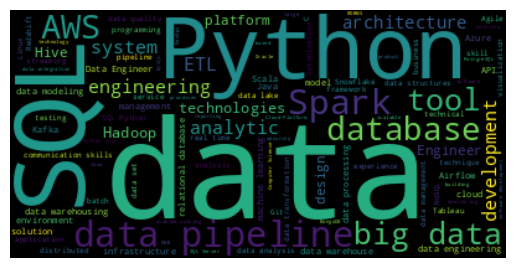


*** DevOps Engineer ***



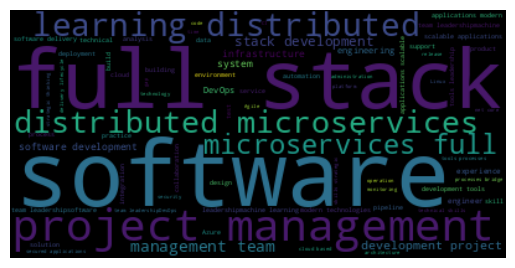


*** Machine Learning Engineer ***



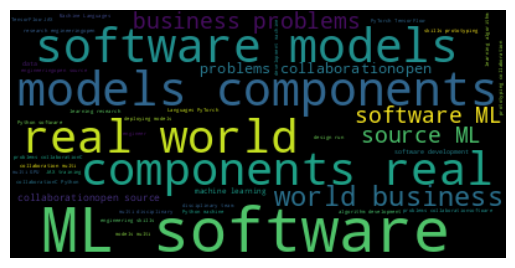


*** Project Manager ***



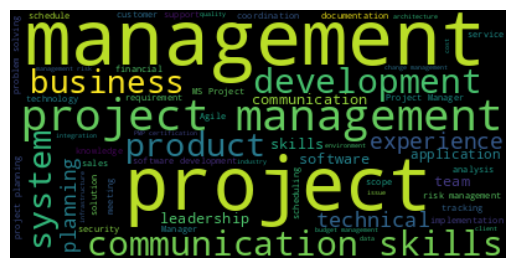


*** QA Engineer ***



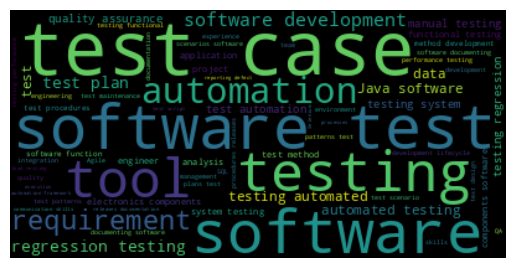


*** Software Engineer ***



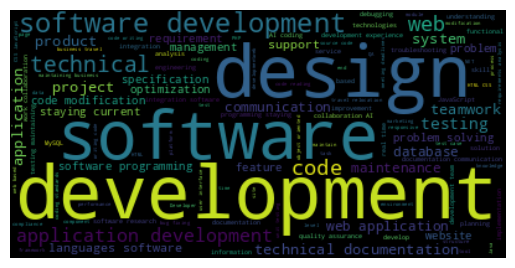


*** UI/UX Engineer ***



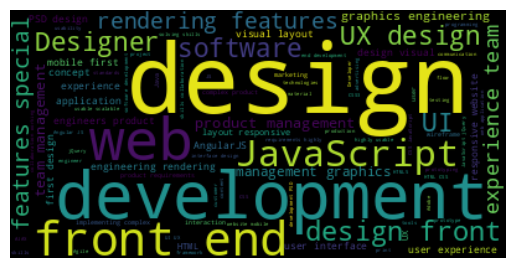

In [8]:
## Visualize data
jobs_list = jda.title.unique().tolist()
for job in jobs_list:

    # Start with one review:
    text = jda[jda.title == job].iloc[0].skills
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",job,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## 6. Modelling

We are now going to translate this skill-extraction problem into a classification one first. And then extract the most important features from each class.

The most important features, in this case, represent the words that most likely will belong to a class ( in our case job title)

***The Naive Bayes Algorithm is chosen to train.***

In [12]:
## Converting text to features
vectorizer = TfidfVectorizer()

#Tokenize and build vocabulary
X = vectorizer.fit_transform(df_tmp.skills)
y = df_tmp.title

# split data into 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

# Fit model
clf = MultinomialNB()
clf.fit(X_train, y_train)
## Predict
y_predicted = clf.predict(X_test)

train data shape:  (1898, 2593)
test data shape:  (475, 2593)


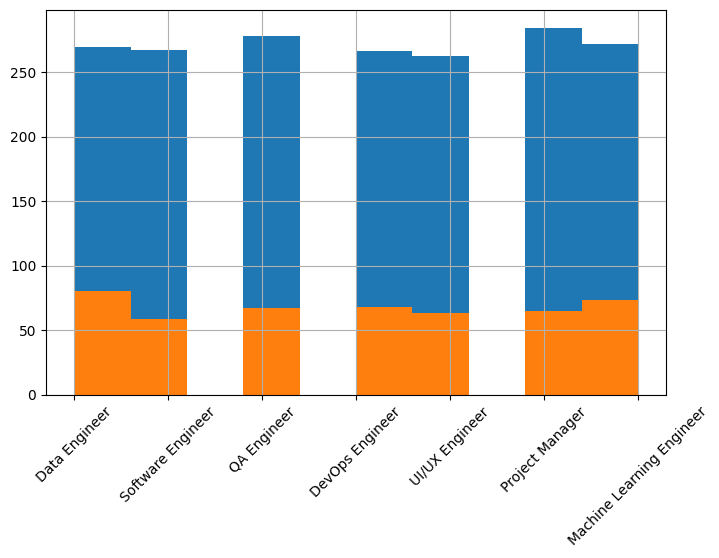

In [13]:
plt.figure(figsize=(8, 5))

y_train.hist()
y_test.hist()

plt.xticks(rotation=45)
plt.show()

In [14]:
#evaluate the predictions
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.8842105263157894
Classes: (to help read Confusion Matrix)
 ['Data Engineer' 'DevOps Engineer' 'Machine Learning Engineer'
 'Project Manager' 'QA Engineer' 'Software Engineer' 'UI/UX Engineer']
Confusion Matrix: 
[[78  1  0  0  1  0  0]
 [ 2 56  0  4  3  3  0]
 [ 8  2 59  2  0  2  0]
 [ 2  1  0 60  1  0  1]
 [ 0  4  0  3 58  2  0]
 [ 0  0  1  2  0 52  4]
 [ 0  0  1  2  0  3 57]]
Classification Report: 
                           precision    recall  f1-score   support

            Data Engineer       0.87      0.97      0.92        80
          DevOps Engineer       0.88      0.82      0.85        68
Machine Learning Engineer       0.97      0.81      0.88        73
          Project Manager       0.82      0.92      0.87        65
              QA Engineer       0.92      0.87      0.89        67
        Software Engineer       0.84      0.88      0.86        59
           UI/UX Engineer       0.92      0.90      0.91        63

                 accuracy          

In [18]:
import joblib

# Save the vectorizer to a file
joblib.dump(vectorizer, '/content/drive/MyDrive/FYP/datasets/final-skills/completed/models/vectorizer-1.pkl')

# Save the classifier to a file
joblib.dump(clf, '/content/drive/MyDrive/FYP/datasets/final-skills/completed/models/classifier-1.pkl')

['/content/drive/MyDrive/FYP/datasets/final-skills/completed/models/classifier-1.pkl']

In [ ]:
import joblib

# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove tabulation and punctuation
    text = re.sub('[^\w\s]', ' ', text)

    # Remove digits
    text = re.sub('\d+', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_text = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_text = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(lemmatized_text)

    return text

In [ ]:
# Function for predicting job title
def predict_job_title(skills, vectorizer, classifier):
    # Preprocess the job description
    preprocessed_skills = preprocess_text(skills)

    # Vectorize the preprocessed job description
    skills_vector = vectorizer.transform([preprocessed_skills])

    # Predict the job title
    predicted_title = classifier.predict(skills_vector)

    return predicted_title[0], preprocessed_skills

In [ ]:
# Load the vectorizer
vectorizer = joblib.load('/content/drive/MyDrive/FYP/datasets/final-skills/completed/models/vectorizer-1.pkl')

# Load the classifier
clf = joblib.load('/content/drive/MyDrive/FYP/datasets/final-skills/completed/models/classifier-1.pkl')

In [26]:
sample_skills = """
html,css,javascript,figma,adobe xd,mobile responsive
"""

print(f"{predict_job_title(sample_skills, vectorizer, clf)}")

('UI/UX Engineer', 'html cs javascript figma adobe xd mobile responsive')


In [24]:
sample_skills = """
Java, C++, JavaScript, React, Node.js, Git, Docker
"""

print(f"{predict_job_title(sample_skills, vectorizer, clf)}")

('Data Engineer', 'java c javascript react node j git docker')


In [30]:
sample_skills = """
html, css,javscript,react,node,angular,git,mongodb,mysql,agile,debugging,python,data
"""

print(f"{predict_job_title(sample_skills, vectorizer, clf)}")

('Data Engineer', 'html cs javscript react node angular git mongodb mysql agile debugging python data')
